In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
%cd /data/home/ksh0511/AI502

/data/home/ksh0511/AI502


In [7]:
import os
from io import StringIO
path = 'term_pj'
file_name = '/task2_data.txt'
file_path = path + file_name
# 파일 열기 및 내용 읽기
with open(file_path, 'r') as file:
    file_content = file.read()
lines = file_content.strip().split('\n')
df = pd.read_csv(StringIO('\n'.join(lines)))

# 'color'와 'size' 열을 정수형으로 변환
df['color'] = df['color'].astype(int)
df['size'] = df['size'].astype(int)

# DataFrame 출력
print(df)

          order  product  customer  color  size  group
0        391395    20019    106251    557    21     15
1        391395    20114    106251    396    21     15
2        112116    45195    135056    243    24     23
3        112116     6117    135056    338    24     23
4        739883      622    233090    586    25     23
...         ...      ...       ...    ...   ...    ...
2666257  576096     9045     15446    462    24      8
2666258  314874    20257    217058    437    21     15
2666259  314874    40360    217058     65    25     15
2666260  314874    46311    217058    460    25      8
2666261  532104    39073    267415    499    24      7

[2666262 rows x 6 columns]


In [8]:
path = 'term_pj'
file_name = '/task2_train_label.txt'
file_path = path + file_name
with open(file_path, 'r') as file:
    file_content = file.read()
lines_train_label = file_content.strip().split('\n')
print(len(lines_train_label))


1866383


In [9]:
path = 'term_pj'
file_name = '/task2_valid_label.txt'
file_path = path + file_name

with open(file_path, 'r') as file:
    file_content = file.read()
lines_valid_label = file_content.strip().split('\n')

# train label  + valid label
lines_label=lines_valid_label+lines_train_label
len(lines_label)

2266323

In [10]:
# 라벨 데이터를 DataFrame에 추가
label_df = pd.DataFrame([x.split('\t') for x in lines_label], columns=['order','product', 'label'])
label_df['label'] = label_df['label'].astype(int)
label_df['product'] = label_df['product'].astype(int)
label_df['order'] =label_df['order'].astype(int)
# df DataFrame과 label_df DataFrame을 product와 customer 열을 기준으로 병합
merged_df = pd.merge(df, label_df, on=['order','product'], how='left')


In [ ]:

train_valid_df = merged_df.dropna(subset=['label'])

# label 컬럼의 데이터 타입을 정수형으로 변환
train_valid_df['label'] =train_valid_df['label'].astype(int)
train_valid_df

In [ ]:
train_valid_df.to_csv('train_valid_drop.csv', index=False)

# 통합된 인덱싱 파일 -> train / valid 데이터 분할

In [4]:
order_data = pd.read_csv("train_valid_drop.csv", encoding='cp949')
data_x = order_data.iloc[:, 1:-1]  # 마지막 컬럼(label)을 제외한 데이터
data_y = order_data.iloc[:, -1]   # 마지막 컬럼(label)만 라벨로 저장

In [8]:
order_data

,order,product,customer,color,size,group,label
0,391395,20019,106251,557,21,15,0
1,112116,45195,135056,243,24,23,0
2,112116,6117,135056,338,24,23,1
3,739883,35070,233090,557,25,23,0
4,739883,37297,233090,472,25,23,0
...,...,...,...,...,...,...,...
2266318,576096,9045,15446,462,24,8,1
2266319,314874,20257,217058,437,21,15,0
2266320,314874,40360,217058,65,25,15,0
2266321,314874,46311,217058,460,25,8,0


In [9]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266323 entries, 0 to 2266322
Data columns (total 7 columns):
 #   Column    Dtype
---  ------    -----
 0   order     int64
 1   product   int64
 2   customer  int64
 3   color     int64
 4   size      int64
 5   group     int64
 6   label     int64
dtypes: int64(7)
memory usage: 121.0 MB


# Size Distribution by Group')

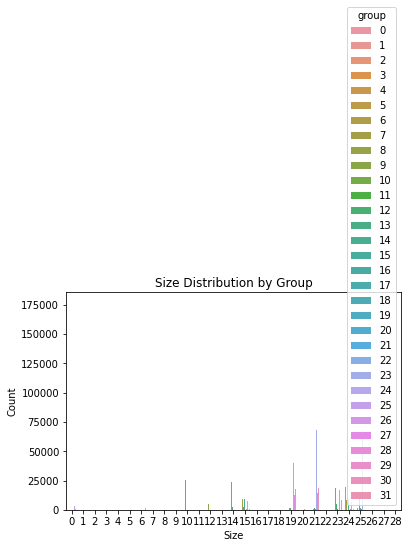

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='size', hue='group', data=order_data)
plt.title('Size Distribution by Group')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [11]:
import pandas as pd

group_summary_data = []

for group in range(32):
    group_data = order_data[order_data['group'] == group]
    
    color_values = sorted(group_data['color'].unique())
    size_values = sorted(group_data['size'].unique())
    
    color_count = len(color_values)
    size_count = len(size_values)
    
    group_summary_data.append({'Group': group, 'Color Values': color_values, 'Color Count': color_count,
                               'Size Values': size_values, 'Size Count': size_count})

group_summary = pd.DataFrame(group_summary_data)

# 결과 출력
print(group_summary)


    Group                                       Color Values  Color Count  \
0       0                          [292, 315, 378, 460, 461]            5   
1       1                                              [450]            1   
2       2                                              [581]            1   
3       3                                              [581]            1   
4       4  [6, 20, 25, 33, 40, 48, 51, 59, 65, 70, 76, 77...           89   
5       5  [22, 29, 50, 86, 89, 94, 115, 120, 127, 129, 1...           33   
6       6                                              [581]            1   
7       7  [0, 6, 20, 48, 49, 70, 79, 82, 106, 109, 110, ...           70   
8       8  [2, 4, 13, 22, 29, 86, 89, 94, 107, 115, 120, ...           42   
9       9  [1, 6, 7, 9, 10, 17, 18, 20, 31, 32, 34, 35, 3...          220   
10     10  [8, 37, 106, 126, 137, 138, 166, 180, 181, 197...           34   
11     11                                              [437]            1   

# indexing

In [12]:
# 새로운 데이터프레임을 저장할 리스트
new_data = []

for group in range(32):
    # 각 그룹에 대한 데이터 추출
    group_data = order_data[order_data['group'] == group]
    
    # 색상 및 사이즈의 값들을 추출하여 정렬
    color_values = sorted(group_data['color'].unique())
    size_values = sorted(group_data['size'].unique())
    
    # 색상 및 사이즈의 모든 조합에 대해 새로운 행 생성
    for color in color_values:
        for size in size_values:
            new_data.append({'group': group, 'color': color, 'size': size})

# 리스트를 데이터프레임으로 변환
new_df = pd.DataFrame(new_data)

# 결과 출력
print(new_df)

       group  color  size
0          0    292    15
1          0    292    19
2          0    292    21
3          0    292    23
4          0    292    24
...      ...    ...   ...
15647     31    638    22
15648     31    638    23
15649     31    638    24
15650     31    638    25
15651     31    638    27

[15652 rows x 3 columns]


In [13]:
new_df['indexing'] = new_df.reset_index().index

# 새로운 데이터프레임과 주어진 데이터프레임 간의 매핑 수행
merged_df = pd.merge(order_data, new_df, on=['group', 'color', 'size'], how='right')
merged_df.dropna(inplace=True)

# 모든 컬럼의 데이터 타입을 int로 변환
merged_df = merged_df.astype(int)

# 결과 출력
print(merged_df)

          order  product  customer  color  size  group  label  indexing
0        652386    32929    214914    292    15      0      0         0
1        522832    32929     11357    292    15      0      1         0
2         94970    32929    280516    292    15      0      0         0
3        158329    32929    103604    292    15      0      0         0
4        797773    32929    281744    292    15      0      1         0
...         ...      ...       ...    ...   ...    ...    ...       ...
2270632  316498    13947     73249    638     9     31      0     15640
2270633  542028    13947     90144    638     9     31      1     15640
2270634  133479    13947     57744    638     9     31      0     15640
2270635  657114    13947     77069    638     9     31      0     15640
2270636  387788    13947    133373    638     9     31      0     15640

[2266323 rows x 8 columns]


In [14]:
merged_df.to_csv('train_valid_drop_indexing.csv', index=False)

# valid data indexing

In [15]:
path = 'term_pj'
file_name = '/task2_valid_label.txt'
file_path = path + file_name
with open(file_path, 'r') as file:
    file_content = file.read()
lines_valid_label = file_content.strip().split('\n')


In [16]:
print(lines_valid_label[:30]) #399940

['479016\t11608\t0', '673630\t25789\t0', '562150\t33265\t1', '159431\t14148\t1', '637122\t56999\t1', '728414\t51540\t0', '207131\t49465\t0', '663331\t27141\t1', '777923\t50695\t0', '473084\t47334\t1', '177980\t57209\t1', '510271\t47558\t0', '674137\t12368\t1', '339543\t25630\t1', '180241\t22816\t0', '251446\t14717\t0', '63727\t38309\t1', '702846\t41225\t0', '197925\t1072\t1', '642034\t26925\t1', '441595\t35437\t0', '767755\t5505\t1', '277632\t45018\t1', '304679\t962\t0', '19393\t17003\t1', '95131\t43976\t0', '651382\t35711\t0', '608253\t51375\t0', '459938\t12589\t1', '466978\t57066\t0']


In [18]:
mapping_valid_df = pd.DataFrame([x.split('\t') for x in lines_valid_label], columns=['order', 'product', 'label'])

# 데이터 타입 변환
mapping_valid_df['order'] = mapping_valid_df['order'].astype(int)
mapping_valid_df['product'] = mapping_valid_df['product'].astype(int)
mapping_valid_df['label'] = mapping_valid_df['label'].astype(int)
# 조건에 맞는 행 필터링
filtered_valid_data = merged_df.merge(mapping_valid_df, on=['order', 'product','label'], how='inner')

print(filtered_valid_data)

         order  product  customer  color  size  group  label  indexing
0        94970    32929    280516    292    15      0      0         0
1       797773    32929    281744    292    15      0      1         0
2       221904    14102     30635    315    15      0      1         6
3       160097     3812     71524    315    19      0      0         7
4       201203    22735     99063    315    21      0      0         8
...        ...      ...       ...    ...   ...    ...    ...       ...
399935  147828    13947    121109    638     9     31      0     15640
399936   98853    13947    284095    638     9     31      0     15640
399937  811643    13947     90790    638     9     31      0     15640
399938  229147    13947    195505    638     9     31      1     15640
399939  133479    13947     57744    638     9     31      0     15640

[399940 rows x 8 columns]


In [19]:
filtered_valid_data.to_csv('valid_indexing.csv', index=False)

# train data indexing

In [20]:
path = 'term_pj'
file_name = '/task2_train_label.txt'
file_path = path + file_name
with open(file_path, 'r') as file:
    file_content = file.read()
lines_train_label = file_content.strip().split('\n')
print(len(lines_train_label))


1866383


In [21]:
mapping_train_df = pd.DataFrame([x.split('\t') for x in lines_train_label], columns=['order', 'product', 'label'])

# 데이터 타입 변환
mapping_train_df['order'] = mapping_train_df['order'].astype(int)
mapping_train_df['product'] = mapping_train_df['product'].astype(int)
mapping_train_df['label'] = mapping_train_df['label'].astype(int)
# 조건에 맞는 행 필터링
filtered_train_data = merged_df.merge(mapping_train_df, on=['order', 'product','label'], how='inner')

print(filtered_train_data)

          order  product  customer  color  size  group  label  indexing
0        652386    32929    214914    292    15      0      0         0
1        522832    32929     11357    292    15      0      1         0
2        158329    32929    103604    292    15      0      0         0
3        147612    32929    100558    292    15      0      0         0
4        457097    55910    227708    292    19      0      0         1
...         ...      ...       ...    ...   ...    ...    ...       ...
1866378  466738    13947    120242    638     9     31      1     15640
1866379  316498    13947     73249    638     9     31      0     15640
1866380  542028    13947     90144    638     9     31      1     15640
1866381  657114    13947     77069    638     9     31      0     15640
1866382  387788    13947    133373    638     9     31      0     15640

[1866383 rows x 8 columns]


In [22]:
filtered_train_data.to_csv('train_indexing.csv', index=False)